<a href="https://colab.research.google.com/github/Gustavo-Inacio/school-website/blob/master/Cronos_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Cronos Machine Learning
Olá, seja bem vindo! Estamos muito felizes por você ter chegado até aqui.

Hoje você ira aprender todo o processo de Machine Learning da nossa plataforma.

Mais antes de tudo, o que é Machine Learning?


# Machine learning
Machine Learning ou aprendizagem de máquina, é um subcampo da Engenharia e da ciência da computação que evoluiu do estudo de reconhecimento de padrões e da teoria do aprendizado computacional em inteligência artificial.

Com o Machine Learning é possível fazer previsões futuras com base no estudo automático dos dados já existentes, como uma previsão de vendas futuras. Sabemos que para fazer uma previsão de vendas, devemos levar diversas datas que aumentam o número de vendas em consideração, como o natal.

Estamos utilizando o Colab para demonstrar como seria a aplicação em nossa plataforma Cronos.

# Objetivos
1) Prever as vendas dos produtos usando dados históricos

2) Estimar o impacto de uma semana com feriado nas vendas semanais

3) Recomendar o que pode ser feito

Neste caderno, incluí o seguinte
1. Preparação de dados
* Mesclagem de dados
* Extraindo informações de data
* Informação das Colunas
* Valores ausentes

2. Análise Exploratória de Dados
* Poularity de tipos de loja
* Vendas Médias - Tipo de Loja
* Média de vendas mensais - por ano
* Média de vendas semanais - por ano
* Vendas Médias da Loja
* Vendas de feriados x feriados
* Relacionamento: semana do ano vs vendas
* Relacionamento: Tamanho da Loja vs. Vendas
* Relacionamento: Temperatura vs Vendas
* Relacionamento: Preço do Combustível vs Vendas
* Relacionamento: CPI vs Vendas
* Relacionamento: Desemprego vs Vendas
* Matriz de Coorelação

3. Preparação de dados para treinamento de modelo

4. Machine Learning
* Regressão linear
* Ridge Regression
* Árvore de Decisão
* Floresta Aleatória
* Ajuste de hiperparâmetros de floresta aleatória
* Máquina de aumento de gradiente
* Ajuste de Hiperparâmetros da Máquina de Gradient Boosting
* Comparação de Modelos
* Fazendo previsões
* Submissão
5. Inferências e conclusões

# 1. Preparação dos dados
Abaixo temos a importação dos dados para o colab poder distribuir os arquivos no código

Lembrando que essa base de dados não é brasileira, e sim americana. Portanto alguns feriados que são comemorados aqui no Brasil, não necessariamente são comemorados nos EUA. Além de que, algumas informações nos arquivos não vão estar completamente traduzidas.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install jovian opendatasets --upgrade --quiet

!pip install numpy pandas matplotlib.pyplot seaborn  --upgrade --quite

!pip install plotly --upgrade 


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --quite


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
import os
from zipfile import ZipFile

import plotly.express as px

%matplotlib inline


O conjunto de dados contém os três arquivos no formato csv:

train.csv: este arquivo possui 421570 linhas e 5 colunas. As colunas contêm as informações de uma loja, departamento, data, vendas semanais e se uma determinada semana é uma semana de feriado ou não

store.csv: este arquivo possui 45 linhas e 3 colunas. As colunas correspondem às lojas, seus tipos e tamanhos de lojas

features.csv: este arquivo 8190 linhas e 12 colunas. Este arquivo novamente contém algumas informações adicionais sobre as lojas e a região em que uma determinada loja está localizada. Ele contém informações de data, temperatura, preço do combustível, índice de preços ao consumidor e taxa de desemprego para a região em que uma determinada loja está localizada. Ele também tem 5 colunas MarkDown1-5 que corresponde a algumas atividades promocionais em andamento em diferentes lojas.

In [ ]:
with ZipFile('../content/drive/MyDrive/Colab Teste/train.csv.zip') as f:
    f.extractall(path='walmart-recruiting-store-sales-forecasting')
    
with ZipFile('../content/drive/MyDrive/Colab Teste/test.csv.zip') as f:
    f.extractall(path='walmart-recruiting-store-sales-forecasting') 
    
with ZipFile('../content/drive/MyDrive/Colab Teste/features.csv.zip') as f:
    f.extractall(path='walmart-recruiting-store-sales-forecasting') 
    
with ZipFile('../content/drive/MyDrive/Colab Teste/sampleSubmission.csv.zip') as f:
    f.extractall(path='walmart-recruiting-store-sales-forecasting') 
os.listdir('walmart-recruiting-store-sales-forecasting')

['sampleSubmission.csv', 'train.csv', 'test.csv', 'features.csv']

In [ ]:

walmart = pd.read_csv('../content/drive/MyDrive/Colab Teste/train.csv.zip')
stores = pd.read_csv('../content/drive/MyDrive/Colab Teste/stores.csv')
features = pd.read_csv('../content/drive/MyDrive/Colab Teste/features.csv.zip')
testing = pd.read_csv('../content/drive/MyDrive/Colab Teste/test.csv.zip')


# Mesclagem de dados
Vamos mesclar os dados de 3 dataframes em um único dataframe e prosseguir com um único dataframe

In [ ]:
merged = walmart.merge(stores, how='left').merge(features, how='left')
testing_merged = testing.merge(stores, how='left').merge(features, how='left')

# Extraindo informações de data

As vendas são dadas para os anos 2012-2012 em uma base semanal. Então, vamos dividir a coluna de data para extrair informações para o ano, mês e semana

In [ ]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = (df.Date.dt.isocalendar().week)*1.0   
    
split_date(merged) 
split_date(testing_merged)

# Informações das colunas: tipos de dados

In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

A maioria das colunas nos dados são colunas numéricas exceto IsHoliday que é do tipo booleano e Type representa um objeto

# Valores ausentes

In [ ]:
missing_values = merged.isna().sum()
px.bar(missing_values,
       x=missing_values.index,
       y=missing_values.values,
       title="Valores Ausentes",
       labels=dict(x="Variable", y="Valores Ausentes"), template='plotly_dark')

Exceto as colunas Markdown 1-5, todas as outras colunas estão completas. Markdown1-5 contém muitos valores ausentes, mais de 250000 em cada coluna de redução. Estas colunas correspondem às ações promocionais realizadas em diferentes lojas. As remarcações promocionais só começaram a partir de novembro de 2011 e não estão sempre ocorrendo em todas as lojas. Portanto, faz sentido por que essas colunas têm muitos valores NaN. Vamos realizar a análise exploratória dos dados e estudar sua relação com as vendas semanais e então decidiremos sobre essas colunas e os valores ausentes

# 2. Análise Exploratória de Dados

In [ ]:

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

style.use('seaborn-poster')
style.use("fivethirtyeight")
plt.rcParams['font.family'] = 'serif'

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (8, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Popularidade dos tipos de loja

In [ ]:
typecounts = merged.Type.value_counts().to_dict()
df = pd.DataFrame(list(typecounts.items()), columns=['Store_Type', 'Counts'])

fig = px.pie(df, values='Counts', names='Store_Type',
             title='Popularidade do Tipo da Loja',labels='Store_Type')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Intuições:

As lojas do tipo A são mais populares do que as do tipo B e C

# Média de Vendas - Tipo de Loja

In [ ]:

avgweeklysales = merged.groupby('Type')['Weekly_Sales'].mean().to_dict()
df = pd.DataFrame(list(avgweeklysales.items()), columns=['Tipo da Loja', 'Média de Vendas'])

fig = px.bar(df, 
             x="Tipo da Loja", 
             y="Média de Vendas",  
             title="Média de Vendas - Por Loja",
             color_discrete_sequence=["#DC143C"], template='plotly_dark')
fig.show()


Intuições:

Em termos de vendas, as lojas do tipo A são superiores aos outros dois tipos

# Média de vendas mensais - por ano

In [ ]:
sales2010 = merged[(merged.Year == 2010)].groupby('Month')['Weekly_Sales'].mean().to_dict()
df2010 = pd.DataFrame(list(sales2010.items()), columns=['Month', 'AvgSales2010'])

sales2011 = merged[merged.Year == 2011].groupby('Month')['Weekly_Sales'].mean().to_dict()
df2011 = pd.DataFrame(list(sales2011.items()), columns=['Month', 'AvgSales2011'])

sales2012 = merged[merged.Year == 2012].groupby('Month')['Weekly_Sales'].mean().to_dict()
df2012 = pd.DataFrame(list(sales2012.items()), columns=['Month', 'AvgSales2012'])

monthly_merged = df2010.merge(df2011, how='right', on='Month').merge(df2012, how='left', on='Month')

import plotly.graph_objs as go
# criar rastreamento 1 
trace1 = go.Bar(
                x = df2010.Month,
                y = df2010.AvgSales2010,
                name = "Média de Vendas 2010")
# criar rastreamento 2 
trace2 = go.Bar(
                x = df2011.Month,
                y = df2011.AvgSales2011,
                name = "Média de Vendas 2011")

# criar rastreamento 3
trace3 = go.Bar(
                x = df2012.Month,
                y = df2012.AvgSales2012,
                name = "Média de Vendas 2012")
data = [trace1, trace2, trace3]
layout = go.Layout(barmode = "group",
                   template='plotly_dark',
                   xaxis_title="Mês",
                   yaxis_title="Média de Vendas Mensais")
fig = go.Figure(data = data, layout = layout)
fig.update_xaxes( dtick=1)
fig.show()

Intuições:

1. O mês de janeiro registrou as vendas mais baixas em 2011 e 2012, enquanto em 2010 as vendas semanais não são fornecidas nos dados

2. De fevereiro a outubro, as vendas semanais quase permanecem constantes em torno de 15.000 durante os 3 anos

3. Novembro e dezembro mostraram as vendas mais altas para 2010 e 2011, enquanto para 2012 os dados de vendas não foram fornecidos


# Média de Vendas semanais  - por ano

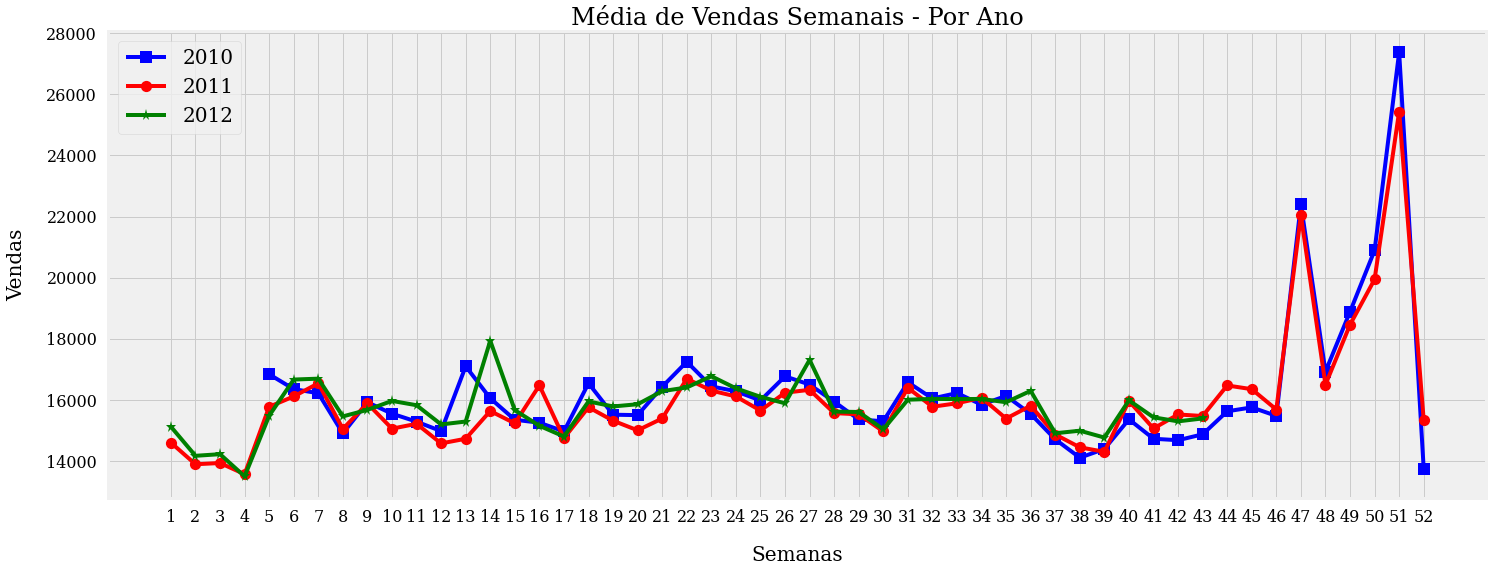

In [ ]:
weekly_sales_2010 = merged[merged.Year==2010].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2011 = merged[merged.Year==2011].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2012 = merged[merged.Year==2012].groupby('WeekOfYear')['Weekly_Sales'].mean()

plt.figure(figsize=(22,8))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values, 's-b')
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values, 'o-r')
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values, '*-g')

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Semanas', fontsize=20, labelpad=20)
plt.ylabel('Vendas', fontsize=20, labelpad=20)

plt.title("Média de Vendas Semanais - Por Ano", fontsize=24)
plt.legend(['2010', '2011', '2012'], fontsize=20);

Intuições:

1. Semanalmente, a semana do feriado de Ação de Graças e uma semana antes do Natal testemunharam as vendas mais altas nos anos de 2010 e 2011

2. Em 2012, a semana no. 14 registrou as vendas mais altas em comparação com outras semanas do ano, mas isso não corresponde a nenhum feriado ou evento especial

# Média de Vendas - Por Loja

In [ ]:
store_sales = merged.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)


fig = px.bar(store_sales, 
             x=store_sales.index, 
             y=store_sales.values,  
             title="Média de Vendas - Por Loja",
             labels={'x':'Lojas', 'y':'Vendas'},
             color_discrete_sequence=["#DC143C"], template='plotly_dark')

fig.update_xaxes(tick0=1, dtick=1)

fig.show()


Intuições:

1. As vendas variam muito entre as 45 lojas

2. Realmente depende de qual categoria de loja se encontra e qual semana do ano específico está sendo considerado

# Média de vendas das lojas - Por Ano

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

store_sales_2010 = merged[merged.Year==2010].groupby('Store')['Weekly_Sales'].mean().to_dict()
store2010_df = pd.DataFrame(list(store_sales_2010.items()), columns=['Store', 'AvgSales2010'])

store_sales_2011 = merged[merged.Year==2011].groupby('Store')['Weekly_Sales'].mean().to_dict()
store2011_df = pd.DataFrame(list(store_sales_2011.items()), columns=['Store', 'AvgSales2011'])

store_sales_2012 = merged[merged.Year==2012].groupby('Store')['Weekly_Sales'].mean().to_dict()
store2012_df = pd.DataFrame(list(store_sales_2012.items()), columns=['Store', 'AvgSales2012'])

fig = make_subplots(rows=3, cols=1, subplot_titles=("Média de Vendas das Lojas em 2010", "Média de Vendas das Lojas em 2011", "Média de Vendas das Lojas em 2012"))

fig.add_trace(go.Bar(x=store2010_df.Store, y=store2010_df.AvgSales2010,),1, 1)

fig.add_trace(go.Bar(x=store2011_df.Store, y=store2011_df.AvgSales2011,),2, 1)

fig.add_trace(go.Bar(x=store2012_df.Store, y=store2012_df.AvgSales2012,),3, 1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), template='plotly_dark', showlegend=False, height=1500)

fig.update_xaxes(title_text="Lojas", row=1, col=1)
fig.update_xaxes(title_text="Lojas", row=2, col=1)
fig.update_xaxes(title_text="Lojas", row=3, col=1)

fig.update_yaxes(title_text="Média de Vendas", row=1, col=1)
fig.update_yaxes(title_text="Média de Vendas", row=2, col=1)
fig.update_yaxes(title_text="Média de Vendas", row=3, col=1)

fig.update_xaxes(tick0=1, dtick=1)
fig.show()

Intuições:

1. A tendência geral de vendas da loja ao longo dos 3 anos permanece a mesma, pois depende do tipo de loja e do seu tamanho

2. As lojas 2,4,13,14 e 20 apresentaram as maiores vendas em todos os 3 anos

# Média de Vendas - Por Departamento

In [ ]:
dept_sales = merged.groupby('Dept')['Weekly_Sales'].mean().sort_values(ascending=False)


fig = px.bar(dept_sales, 
             x=dept_sales.values, 
             y=dept_sales.index,
             template = 'plotly_dark',  
             title="Média de Vendas - Por Departamento",
             labels={'x':'Vendas', 'y':'Departamento'},
             color_discrete_sequence=["#DC143C"], orientation='h', height=1200, width=1000)

fig.update_yaxes(tick0=1, dtick=1)

fig.show()

Intuições:

1. Departamentos diferentes mostraram níveis diferentes de vendas médias

2. Os notáveis ​​são 38,65,72,92 e 95, que têm as vendas médias mais altas

# Média de Vendas dos Departamentos - por ano

Vamos verificar as vendas do departamento anualmente para ver se existem alguns departamentos que têm níveis diferentes de vendas em 3 anos diferentes

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

dept_sales_2010 = merged[merged.Year==2010].groupby('Dept')['Weekly_Sales'].mean().to_dict()
dept2010_df = pd.DataFrame(list(dept_sales_2010.items()), columns=['Dept', 'AvgSales2010'])

dept_sales_2011 = merged[merged.Year==2011].groupby('Dept')['Weekly_Sales'].mean().to_dict()
dept2011_df = pd.DataFrame(list(dept_sales_2011.items()), columns=['Dept', 'AvgSales2011'])

dept_sales_2012 = merged[merged.Year==2012].groupby('Dept')['Weekly_Sales'].mean().to_dict()
dept2012_df = pd.DataFrame(list(dept_sales_2012.items()), columns=['Dept', 'AvgSales2012'])

fig = make_subplots(rows=1, cols=3, subplot_titles=("Média de Vendas dos Departamentos 2010", "Média de Vendas dos Departamentos 2011", "Média de Vendas dos Departamentos 2012"))

fig.add_trace(go.Bar(x=dept2010_df.AvgSales2010, y=dept2010_df.Dept, orientation='h',),1, 1)

fig.add_trace(go.Bar(x=dept2011_df.AvgSales2011, y=dept2011_df.Dept, orientation='h',),1, 2)

fig.add_trace(go.Bar(x=dept2012_df.AvgSales2012, y=dept2012_df.Dept, orientation='h',),1, 3)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), template = 'plotly_dark', showlegend=False, height=1000)

fig.update_xaxes(title_text="Média de Vendas", row=1, col=1)
fig.update_xaxes(title_text="Média de Vendas", row=1, col=2)
fig.update_xaxes(title_text="Média de Vendas", row=1, col=3)

fig.update_yaxes(title_text="Departamento", row=1, col=1)
fig.update_yaxes(title_text="Departamento", row=1, col=2)
fig.update_yaxes(title_text="Departamento", row=1, col=3)

fig.update_yaxes(tick0=1, dtick=1)
fig.show()

Intuições:

A tendência de vendas anual permanece a mesma. Lojas com vendas mais altas apareceram em todos os 3 anos enquanto com vendas mais baixas mostraram a mesma tendência em todos os 3 anos


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

holiday_sales = merged.groupby('IsHoliday')['Weekly_Sales'].mean()
holiday_counts = merged.IsHoliday.value_counts()

fig = make_subplots(rows=1, cols=2, subplot_titles=("Vendas em feriados / Fora de Feriados", "Contagem em Feriados / Fora de Feriados"))

fig.add_trace(go.Bar(x=holiday_sales.values, y=holiday_sales.index, orientation='h',),1, 1)

fig.add_trace(go.Bar(x=holiday_counts.values, y=holiday_counts.index, orientation='h',),1, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), template='plotly_dark', showlegend=False)
fig.show()

Intuições:

1. Apenas 7 por cento das semanas nos dados são semanas de feriado

2. Apesar de ser o menor percentual de semanas de feriados, as vendas na semana de feriados são, em média, maiores do que nas semanas fora de feriados


# Relacionamento: semana do ano vs vendas

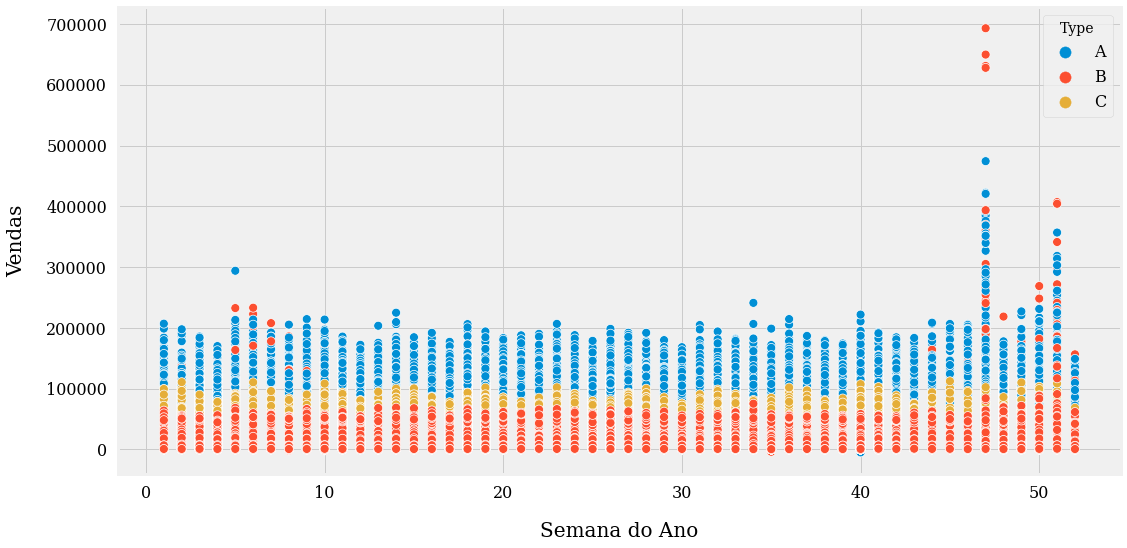

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=merged.WeekOfYear, y=merged.Weekly_Sales, hue=merged.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Semana do Ano', fontsize=20, labelpad=20)
plt.ylabel('Vendas', fontsize=20, labelpad=20);

Intuições:

Isso mostra apenas uma ligeira relação, já que as vendas semanais aumentaram no final do ano

# Relacionamento: Tamanho da Loja vs. Vendas


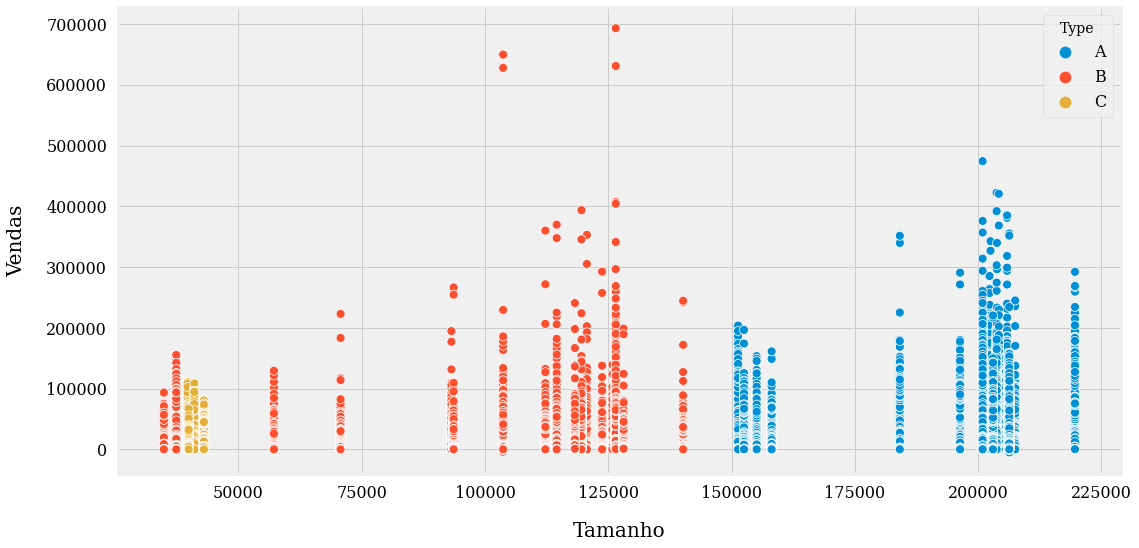

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=merged.Size, y=merged.Weekly_Sales, hue=merged.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Tamanho', fontsize=20, labelpad=20)
plt.ylabel('Vendas', fontsize=20, labelpad=20);

Intuições:

O tamanho da loja mostra uma relação linear com as vendas semanais. As vendas geralmente aumentam com o aumento do tamanho da loja, com algumas exceções

# Relacionamento: Temperatura vs Vendas

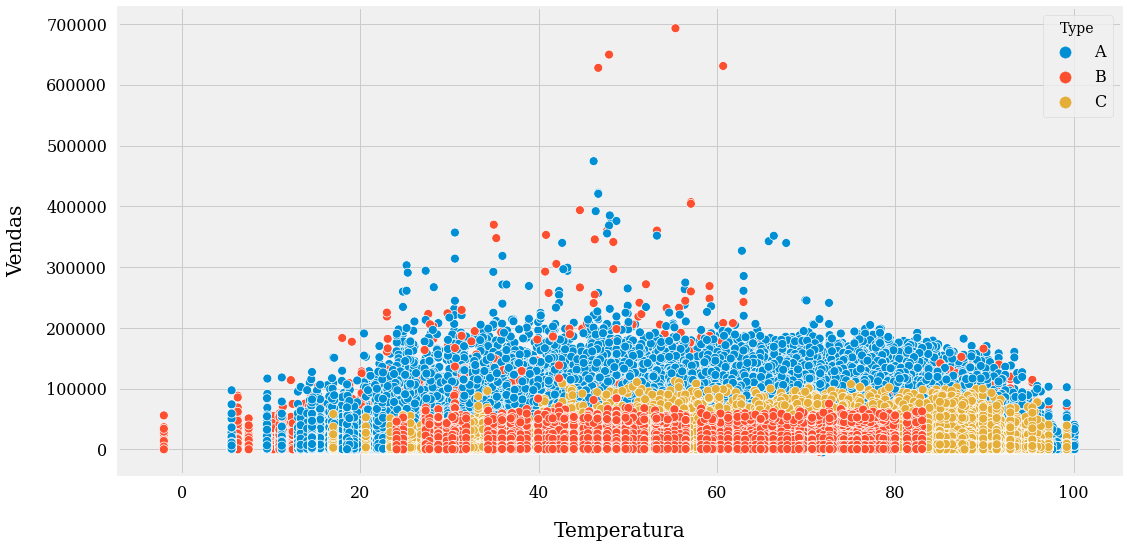

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=merged.Temperature, y=merged.Weekly_Sales, hue=merged.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Temperatura', fontsize=20, labelpad=20)
plt.ylabel('Vendas', fontsize=20, labelpad=20);

Intuições:

Parece não haver relação entre a temperatura da região e as vendas semanais das lojas. Em temperaturas baixas e muito altas as vendas parecem cair um pouco, mas em geral não existe uma relação clara

# Relacionamento: Preço do Combustível vs Vendas

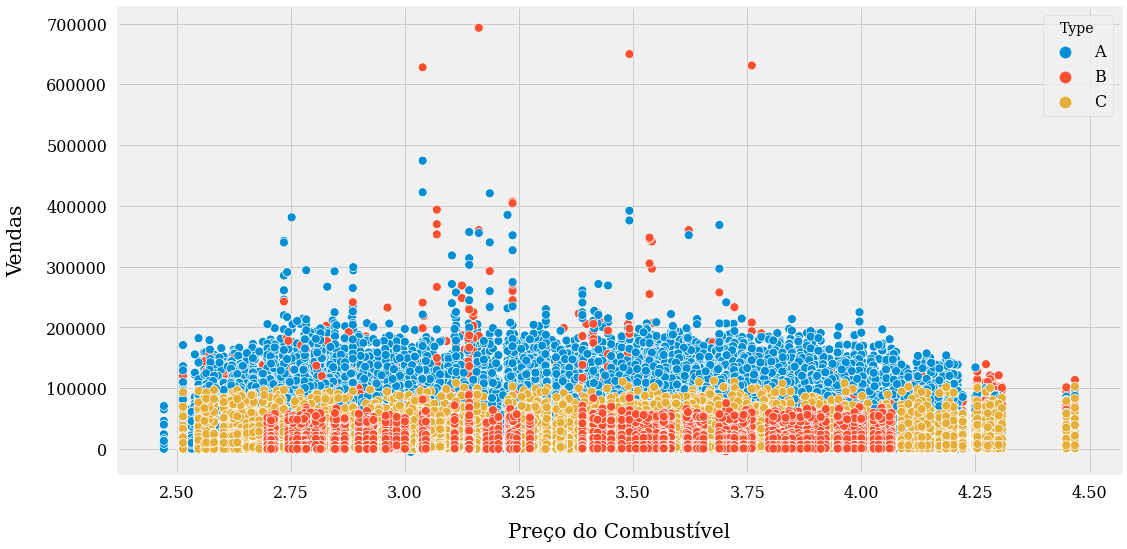

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=merged.Fuel_Price, y=merged.Weekly_Sales, hue=merged.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Preço do Combustível', fontsize=20, labelpad=20)
plt.ylabel('Vendas', fontsize=20, labelpad=20);

Intuições:

Entre o preço do combustível e as vendas não parece existir uma relação clara

# Relacionamento: IPC "Índice de preços no consumidor" vs Vendas

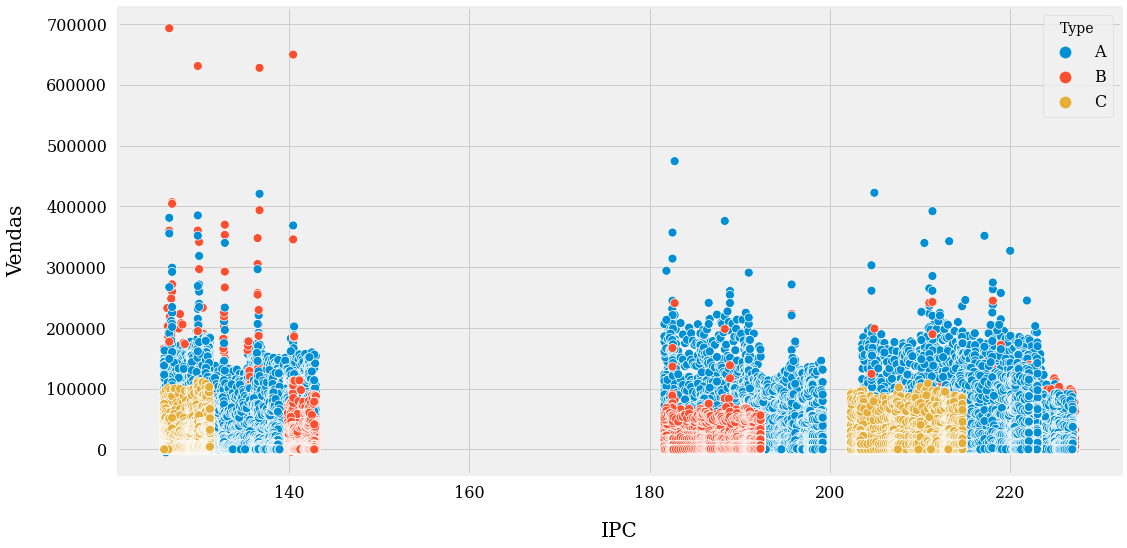

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=merged.CPI, y=merged.Weekly_Sales, hue=merged.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('IPC', fontsize=20, labelpad=20)
plt.ylabel('Vendas', fontsize=20, labelpad=20);

Intuições:

Existem 3 clusters claros, mas não existe nenhuma correlação clara entre o CPI e as vendas semanais


# Relacionamento: Desemprego vs Vendas

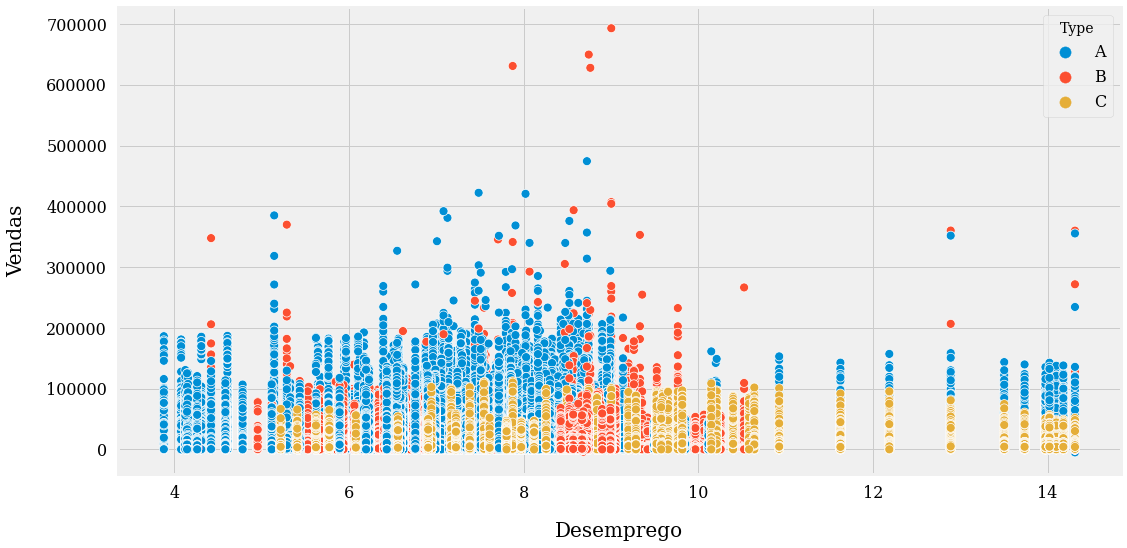

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=merged.Unemployment, y=merged.Weekly_Sales, hue=merged.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Desemprego', fontsize=20, labelpad=20)
plt.ylabel('Vendas', fontsize=20, labelpad=20);


Intuições:

Além disso, a taxa de desemprego não parece afetar as vendas semanais


# Matriz de Coorelação

Vamos estudar a relação entre as diferentes colunas numericamente para verificar como elas se correlacionam com as vendas semanais, a fim de confirmar as inferências que coletamos do estudo EDA acima. Como o valor de correlação só pode ser calculado para as colunas numéricas, primeiro converteremos a coluna 'Tipo' em valores numéricos. Os tipos 'A', 'B' e 'C' serão mapeados para 1, 2 e 3, respectivamente

In [ ]:
storetype_values = {'A':3, 'B':2, 'C':1}
merged['Type_Numeric'] = merged.Type.map(storetype_values)
testing_merged['Type_Numeric'] = testing_merged.Type.map(storetype_values)

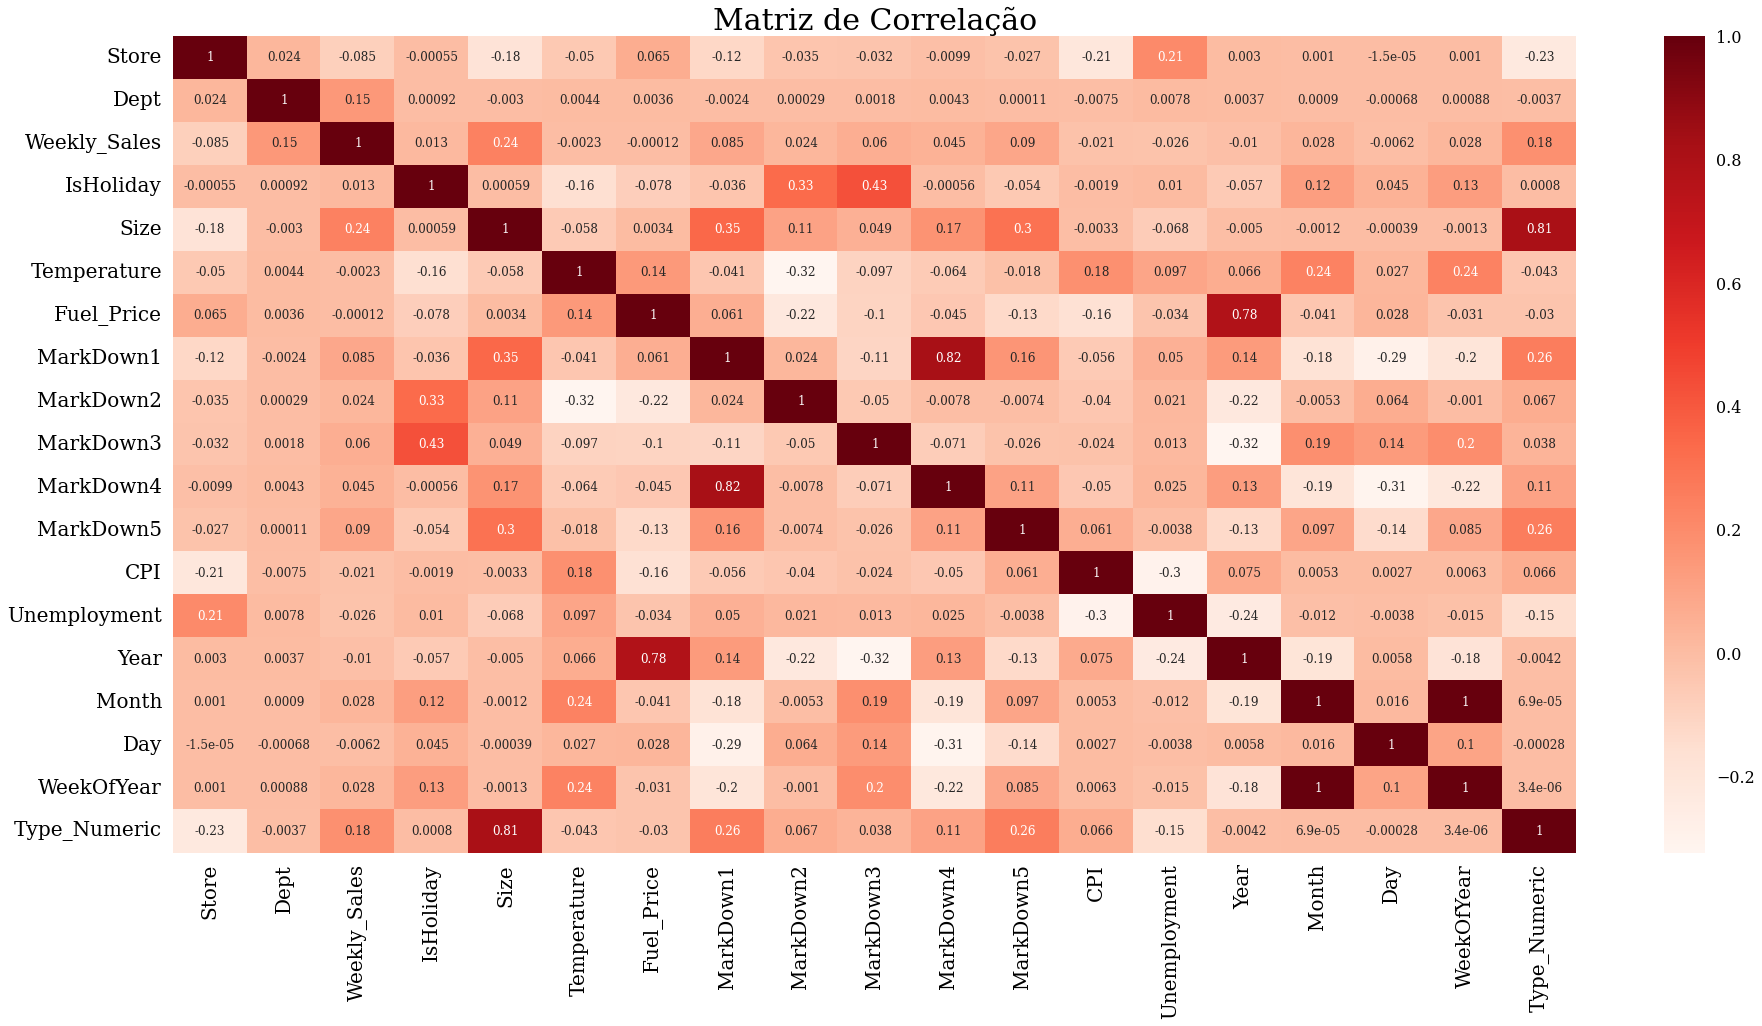

In [ ]:
plt.figure(figsize=(28,14))
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)

sns.heatmap(merged.corr(), cmap='Reds', annot=True, annot_kws={'size':12})
plt.title('Matriz de Correlação', fontsize=30);

Intuições:

* Departamento, tamanho da loja e tipo têm correlação moderada com as vendas semanais
* Markdown1-5 tem uma correlação muito fraca com as vendas semanais, portanto, deixaremos essas colunas de fora
* Temperatura. O preço do combustível, o IPC e o desemprego estão muito fracamente correlacionados com as vendas semanais, portanto, essas colunas também serão descartadas
* IsHoliday será considerado para análise posterior, pois as vendas nas semanas de feriado são maiores do que nas semanas fora de feriado
* Também deixaremos o mês e o dia de fora, pois essas informações já estão contidas no WeekOfYear

# 3. Preparação de dados para treinamento de modelo

As etapas a seguir serão realizadas para preparar os dados para o treinamento do modelo subsequente


> Os dados de treinamento são utilizados para treinar o aprendizado e a eficiência da máquina na análise desses dados.

* Com base na Análise Exploratória de Dados e Estudo de Coorelação, as colunas com relacionamento fraco com a coluna de destino serão descartadas

* Os dataframes de entrada e de destino serão criados

* As entradas serão escaladas na faixa de 0 a 1

* Os conjuntos de dados de treinamento e validação serão criados

* Uma função será definida com base na qual o desempenho dos modelos será medido

In [ ]:
merged = merged.drop(['Date', 'Temperature','Fuel_Price', 'Type', 'MarkDown1', 'MarkDown2', 'MarkDown3',
             'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Month', 'Day' ], axis=1)

testing_merged = testing_merged.drop(['Date', 'Temperature','Fuel_Price', 'Type', 'MarkDown1', 'MarkDown2', 'MarkDown3',
             'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Month', 'Day' ], axis=1)

In [ ]:
# Identificando as colunas de entrada e de destino

input_cols = merged.columns.to_list()
input_cols.remove('Weekly_Sales')
target_col = 'Weekly_Sales'

inputs_df = merged[input_cols].copy()
targets = merged[target_col].copy()

In [ ]:
# Escalando os valores

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(merged[input_cols])

inputs_df[input_cols] = scaler.transform(inputs_df[input_cols])
testing_merged[input_cols] = scaler.transform(testing_merged[input_cols])

In [ ]:
# Criando conjuntos de treinamento e validaçãos

from sklearn.model_selection import train_test_split

train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df, targets, test_size=0.3, random_state=42)

A competição é avaliada com base no erro absoluto médio ponderado (WMAE), então vamos definir uma função que calcula este erro para a avaliação de diferentes modelos de aprendizado de máquina

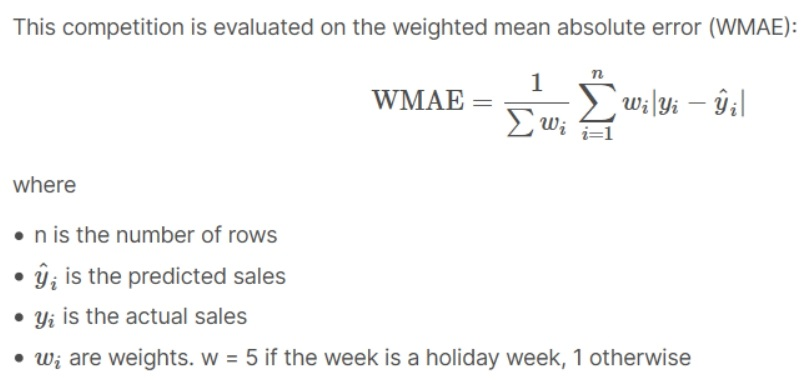

In [ ]:
# Definindo a função para avaliar os modelos

def WMAE(df, targets, predictions):
    weights = df.IsHoliday.apply(lambda x: 5 if x else 1)
    return np.round(np.sum(weights*abs(targets-predictions))/(np.sum(weights)), 2)

# 4. Machine Learning
Os seguintes modelos de ML serão testados neste estudo:

* Regressão linear

* Ridge Regression

* Árvore de Decisão

* Floresta Aleatória

* Máquina de aumento de gradiente

# Regressão linear

In [ ]:
!pip install scikit-learn --quiet

In [ ]:
from sklearn.linear_model import LinearRegression

# Criar e treinar o modelo
model = LinearRegression().fit(train_inputs, train_targets)

# Gerar previsões sobre dados de treinamento
train_preds = model.predict(train_inputs)

# Calcular WMAE em dados de treinamento
train_wmae = WMAE(train_inputs, train_targets, train_preds)
print('A perda WMAE para o conjunto de treinamento é {}.'.format(train_wmae))

# Gerar previsões sobre dados de validação
val_preds = model.predict(val_inputs)

# Calcular WMAE em dados de validação
val_wmae = WMAE(val_inputs, val_targets, val_preds)
print('A perda WMAE para o conjunto de validação é  {}.'.format(val_wmae))

A perda WMAE para o conjunto de treinamento é 14776.36.
A perda WMAE para o conjunto de validação é  14884.37.


# Regressão do Cume

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Criando e treinando o modelo
model_ridge = Ridge().fit(train_inputs, train_targets)

# Gerar previsões sobre dados de treinamento
train_preds = model_ridge.predict(train_inputs)

# Calcule WMAE em dados de traing
train_wmae = WMAE(train_inputs, train_targets, train_preds)
print('A perda WMAE para o conjunto de treinamento é  {}.'.format(train_wmae))

# Gerar previsões sobre dados de validação
val_preds = model.predict(val_inputs)

# Calcular WMAE em dados de validação
val_wmae = WMAE(val_inputs, val_targets, val_preds)
print('A perda WMAE para o conjunto de validação é  {}.'.format(val_wmae))

A perda WMAE para o conjunto de treinamento é  14776.33.
A perda WMAE para o conjunto de validação é  14884.37.


# Árvore de Decisão


In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()

tree.fit(train_inputs, train_targets)

tree_train_preds = tree.predict(train_inputs)

# Calcular WMAE em dados de treinamento
tree_train_wmae = WMAE(train_inputs, train_targets, tree_train_preds)
print('A perda WMAE para o conjunto de treinamento é  {}.'.format(tree_train_wmae))


# Calcular WMAE em dados de validação
tree_val_preds = tree.predict(val_inputs)
tree_val_wmae = WMAE(val_inputs, val_targets, tree_val_preds)
print('A perda WMAE para o conjunto de validação é  {}.'.format(tree_val_wmae))

A perda WMAE para o conjunto de treinamento é  0.0.
A perda WMAE para o conjunto de validação é  1940.47.


# Importância

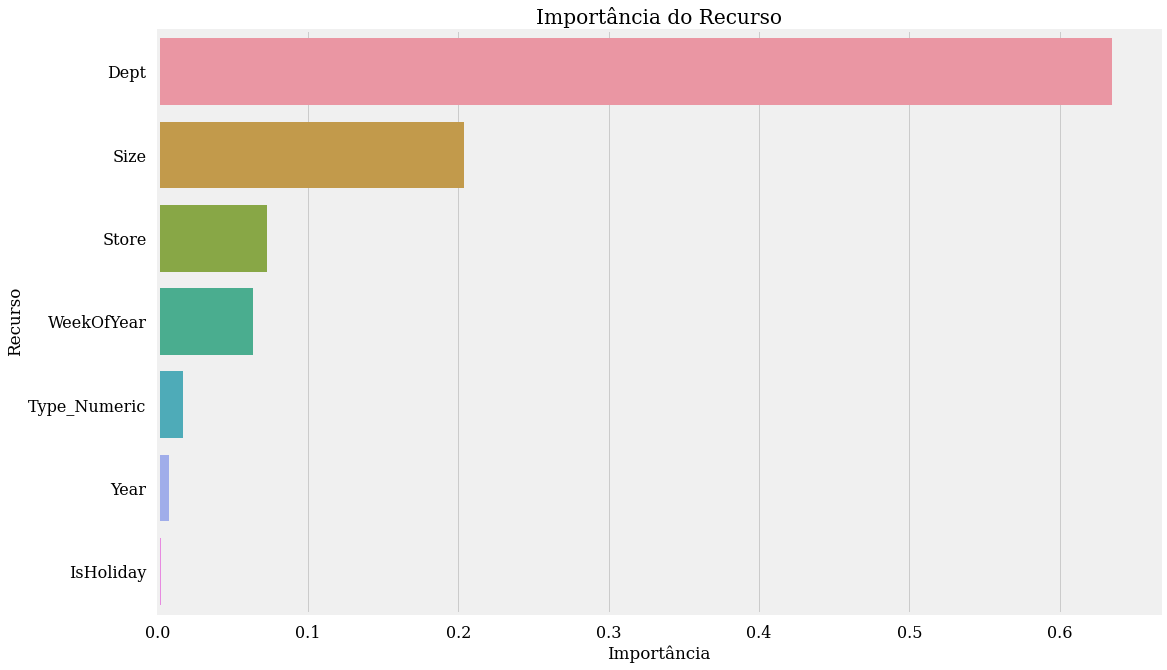

In [ ]:
importance_df = pd.DataFrame({
    'Recurso': train_inputs.columns,
    'Importância': tree.feature_importances_
}).sort_values('Importância', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Importância do Recurso')
sns.barplot(data=importance_df, x='Importância', y='Recurso');

Intuições:

Departamento, Tamanho da Loja e Número da Loja têm maior importância do modelo do que os outros parâmetros

# Floresta Aleatória

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Criando o modelo
rf1 = RandomForestRegressor(n_jobs=-1, random_state=42)

# Ajustando o modelo
rf1.fit(train_inputs, train_targets)

rf1_train_preds = rf1.predict(train_inputs)

# Calcular WMAE em dados de treinamento
rf1_train_wmae = WMAE(train_inputs, train_targets, rf1_train_preds)
print('A perda WMAE para o conjunto de treinamento é  {}.'.format(rf1_train_wmae))

rf1_val_preds = rf1.predict(val_inputs)

# Calcular WMAE em dados de validação
rf1_val_wmae = WMAE(val_inputs, val_targets, rf1_val_preds)
print('A perda WMAE para o conjunto de validação é  {}.'.format(rf1_val_wmae))

A perda WMAE para o conjunto de treinamento é  572.07.
A perda WMAE para o conjunto de validação é  1592.29.


Intuições:

Para a floresta aleatória também, o departamento, o tamanho da loja e o número da loja têm importâncias de modelo mais altas do que os outros parâmetros

# Ajuste de Parâmetros Florestais Aleatórios
Vamos definir duas funções que auxiliam no ajuste de hiperparâmetros.

'test_params' pega os parâmetros de Random Forest e treina o modelo. Depois disso, ele faz previsões do treinamento e validação e retorna o erro médio ponderado médio para os dados de treinamento e validação.

'test_param_and_plot' usa o nome do parâmetro e o intervalo de valores a serem testados. Para esses valores, 'test_params' é chamado dentro da função para treinar e avaliar o modelo. Finalmente, os erros de treinamento e validação são comparados aos valores testados.

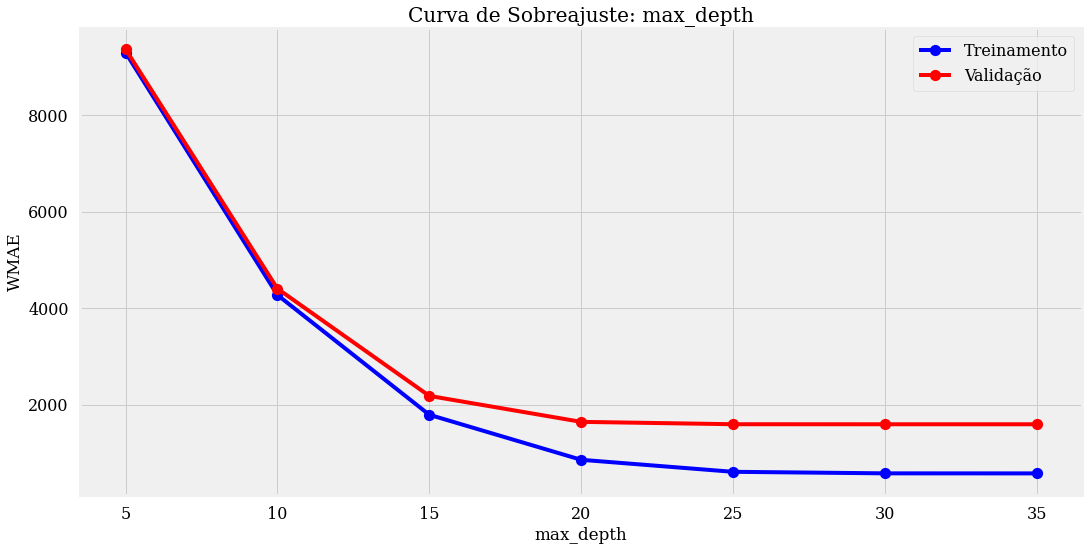

In [ ]:
def test_params(**params):  
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_wmae = WMAE(train_inputs, train_targets, model.predict(train_inputs))
    val_wmae = WMAE(val_inputs, val_targets, model.predict(val_inputs))
    return train_wmae, val_wmae
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_wmae, val_wmae = test_params(**params)
        train_errors.append(train_wmae)
        val_errors.append(val_wmae)
    plt.figure(figsize=(16,8))
    plt.title('Curva de Sobreajuste: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('WMAE')
    plt.legend(['Treinamento', 'Validação'])
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])

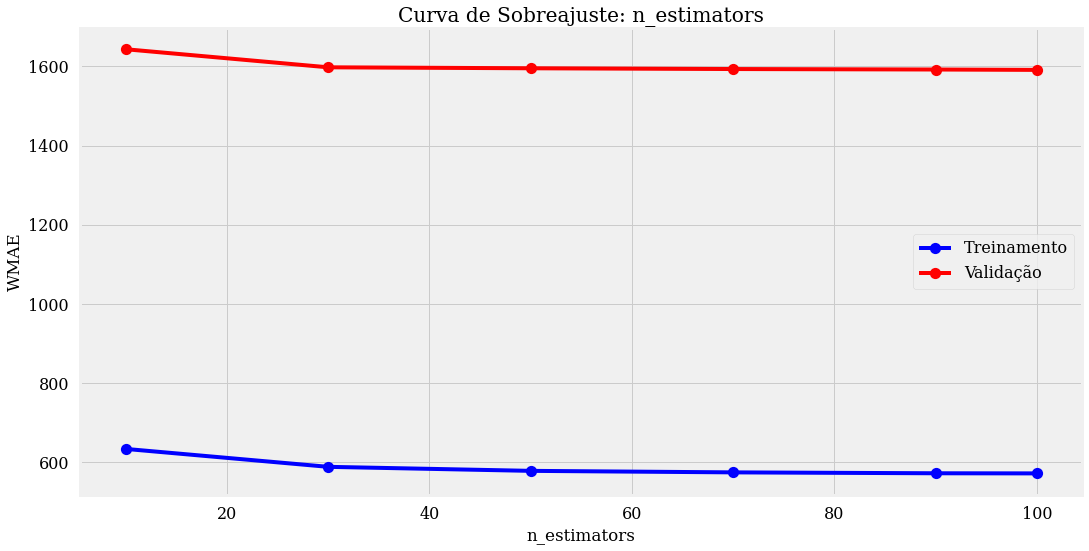

In [ ]:
test_param_and_plot('n_estimators', [10, 30, 50, 70, 90, 100])

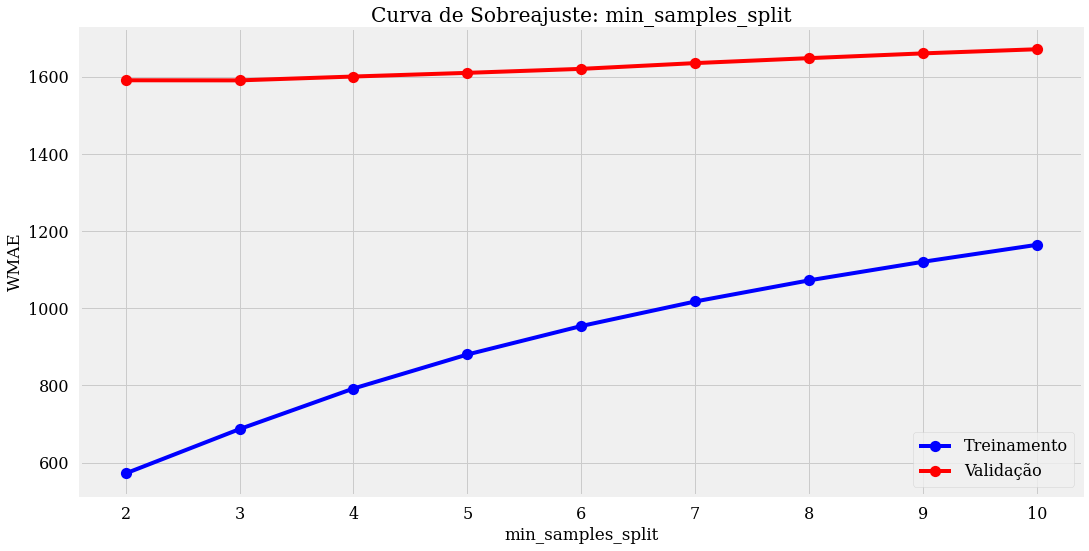

In [ ]:
test_param_and_plot('min_samples_split', [2, 3, 4, 5, 6, 7, 8, 9, 10])

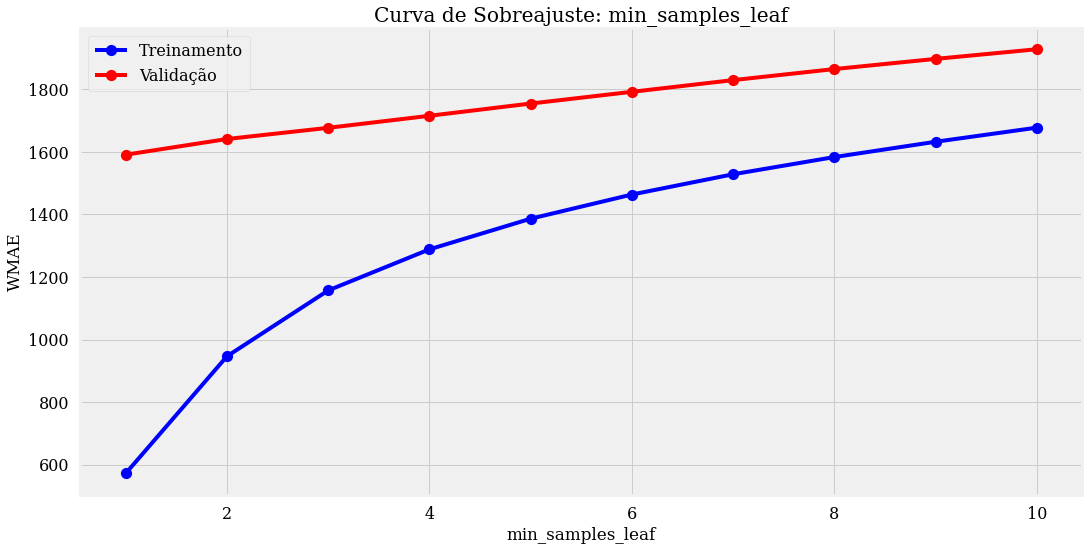

In [ ]:
test_param_and_plot('min_samples_leaf', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

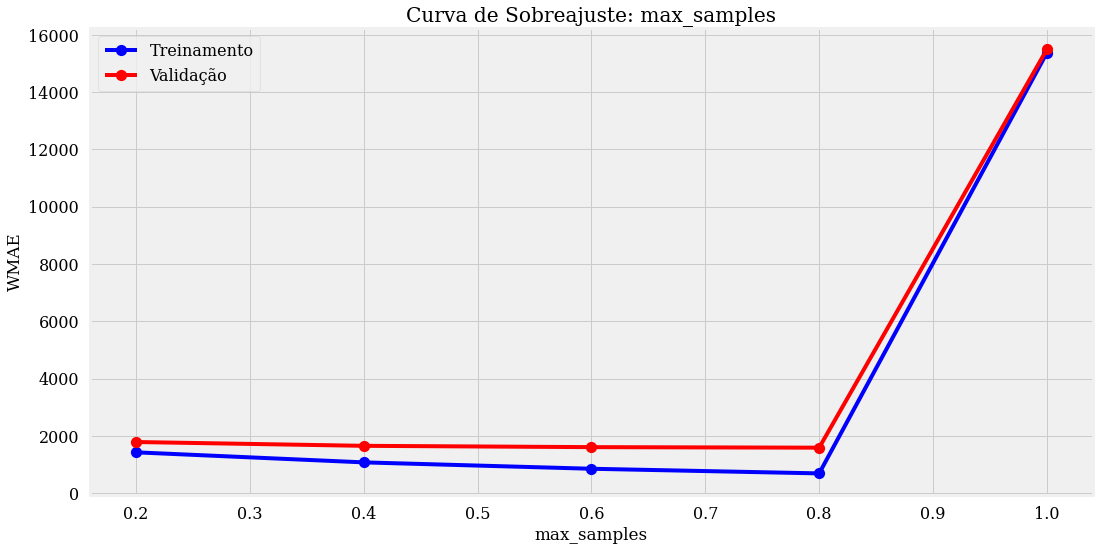

In [ ]:
test_param_and_plot('max_samples', [0.2, 0.4, 0.6, 0.8, 1])

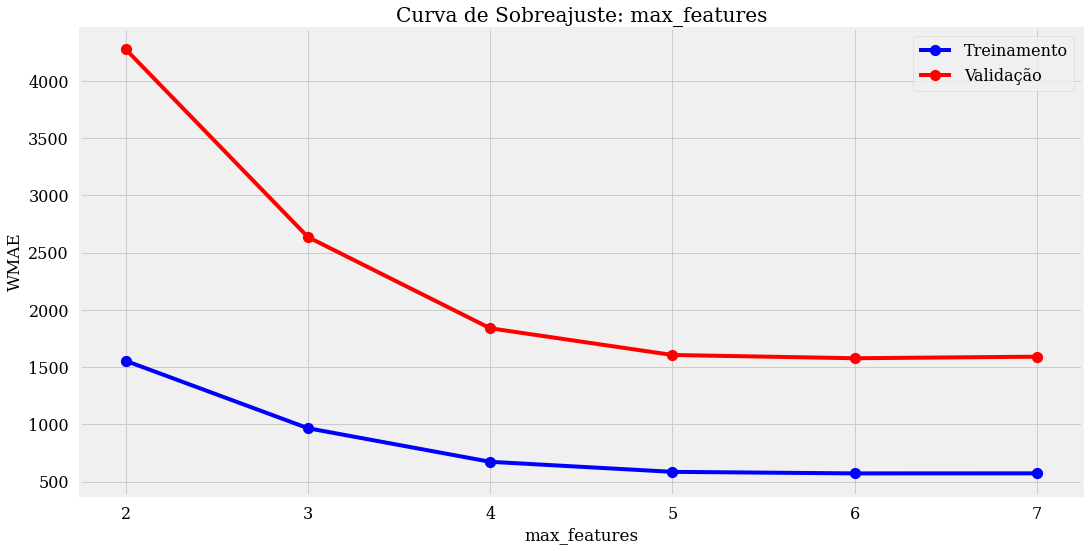

In [ ]:
test_param_and_plot('max_features', [2, 3, 4, 5, 6, 7])

 Partir do teste de parâmetros acima, os seguintes valores de parâmetros foram considerados os melhores, o que minimiza o erro de validação.

* max_depth: 30

* n_estimators: 100

* min_samples_split: 2

* min_samples_leaf: 1

* max_samples: 0,8

* max_features: 7

Esses parâmetros foram ajustados um de cada vez, mas eles estão de alguma forma inter-relacionados e afetam um ao outro, mas a partir disso eu tenho uma ideia aproximada de onde estão os valores ideais. Além disso, depois de variar simultaneamente os parâmetros fazendo algumas suposições fundamentadas, encontrei os seguintes parâmetros que oferecem melhor desempenho do que o modelo de base desafinado

* max_depth: 30

* n_estimators: 130

* min_samples_split: 2

* min_samples_leaf: 1

* max_samples: 0,9999

* max_features: 6

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Criando o modelo
rf1 = RandomForestRegressor(n_jobs=-1, max_depth=30, n_estimators=130, min_samples_split=2, min_samples_leaf=1, max_samples=0.99999, max_features=6,  random_state=42)

# Ajustando o modelo
rf1.fit(train_inputs, train_targets)

rf1_train_preds = rf1.predict(train_inputs)

# Calcule WMAE em dados de treinamento
rf1_train_wmae = WMAE(train_inputs, train_targets, rf1_train_preds)
print('A perda WMAE para o conjunto de treinamento é  {}.'.format(rf1_train_wmae))

rf1_val_preds = rf1.predict(val_inputs)

# Calcular WMAE em dados de validação
rf1_val_wmae = WMAE(val_inputs, val_targets, rf1_val_preds)
print('A perda WMAE para o conjunto de validação é  {}.'.format(rf1_val_wmae))

A perda WMAE para o conjunto de treinamento é  569.99.
A perda WMAE para o conjunto de validação é  1571.46.


# Máquina de aumento de gradiente

In [ ]:
!pip install xgboost lightgbm --upgrade --quiet

     |████████████████████████████████| 173.5 MB 33 kB/s 
     |████████████████████████████████| 2.0 MB 35.0 MB/s 


In [ ]:
from xgboost import XGBRegressor

# Criando o modelo
gbm = XGBRegressor(random_state=42, n_jobs=-1)

# Ajustando o modelo
gbm.fit(train_inputs, train_targets)

gbm_train_preds = gbm.predict(train_inputs)

# Calcule WMAE em dados de treinamento
gbm_train_wmae = WMAE(train_inputs, train_targets, gbm_train_preds)
print('A perda WMAE para o conjunto de treinamento é  {}.'.format(gbm_train_wmae))

gbm_val_preds = gbm.predict(val_inputs)

# Calcular WMAE em dados de validação
gbm_val_wmae = WMAE(val_inputs, val_targets, gbm_val_preds)
print('A perda WMAE para o conjunto de validação é  {}.'.format(gbm_val_wmae))

A perda WMAE para o conjunto de treinamento é  2979.66.
A perda WMAE para o conjunto de validação é  3090.44.


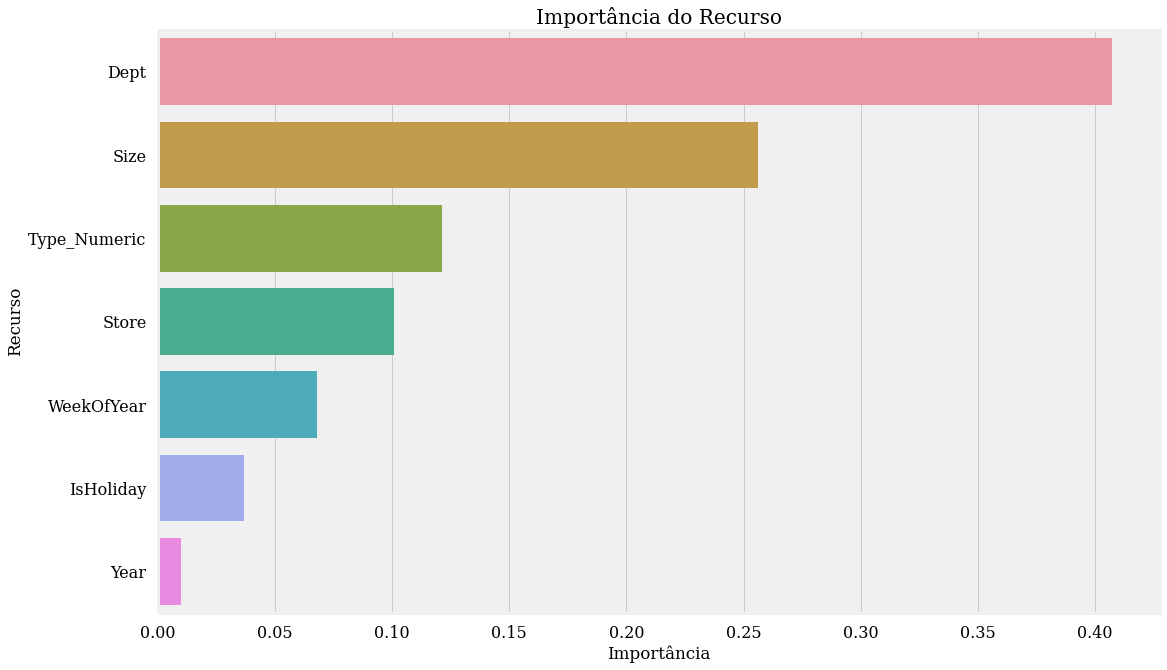

In [ ]:
importance_df = pd.DataFrame({
    'Recurso': train_inputs.columns,
    'Importância': gbm.feature_importances_
}).sort_values('Importância', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Importância do Recurso')
sns.barplot(data=importance_df, x='Importância', y='Recurso');

Intuições:

Para a máquina de aumento de gradiente, o departamento, o tamanho da loja e o tipo de loja são os principais recursos contribuintes

Isso difere um pouco das Árvores de Decisão e Florestas Aleatórias, pois, neste caso, o Tipo de Loja tem maior importância do que o Número da Loja

# Ajuste de parâmetros do modelo
Vamos definir duas funções como as anteriores, que auxiliam no ajuste de hiperparâmetros.

'test_params_xgb' pega os parâmetros de Random Forest e treina o modelo. Depois disso, ele faz previsões sobre o treinamento e validação e retorna o erro médio ponderado médio para os dados de treinamento e validação.

'test_param_and_plot_xgb' pega o nome do parâmetro e o intervalo de valores a serem testados. Para esses valores, 'test_params' é chamado dentro da função para treinar e avaliar o modelo. Finalmente, os erros de treinamento e validação são comparados aos valores testados.

In [ ]:
def test_params_xgb(**params):  
    model = XGBRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_wmae = WMAE(train_inputs, train_targets, model.predict(train_inputs))
    val_wmae = WMAE(val_inputs, val_targets, model.predict(val_inputs))
    return train_wmae, val_wmae
def test_param_and_plot_xgb(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_wmae, val_wmae = test_params_xgb(**params)
        train_errors.append(train_wmae)
        val_errors.append(val_wmae)
    plt.figure(figsize=(16,8))
    plt.title('Curva de Sobreajuste: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('WMAE')
    plt.legend(['Treinamento', 'Validação'])

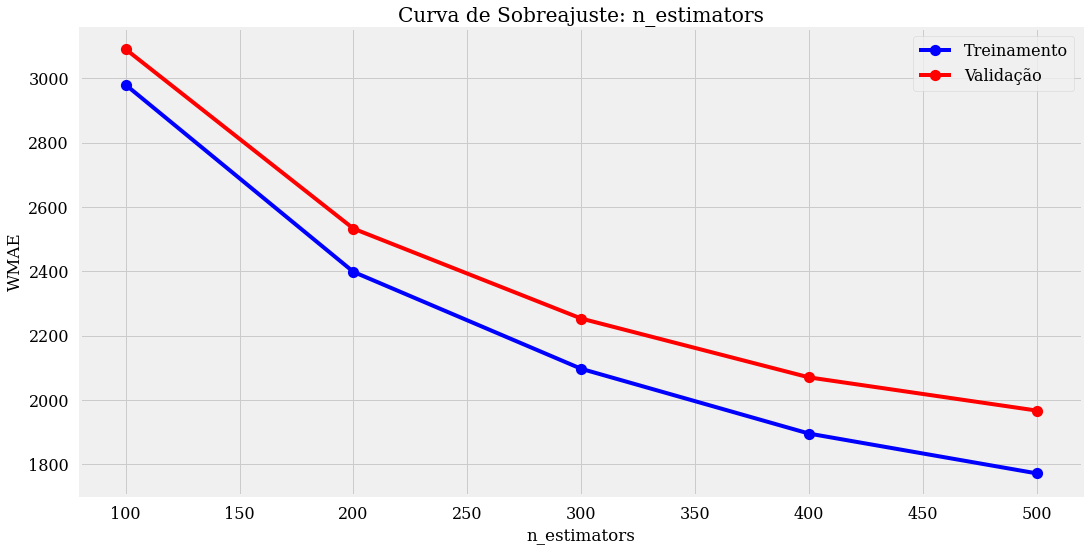

In [ ]:
test_param_and_plot_xgb('n_estimators', [100, 200, 300, 400, 500])

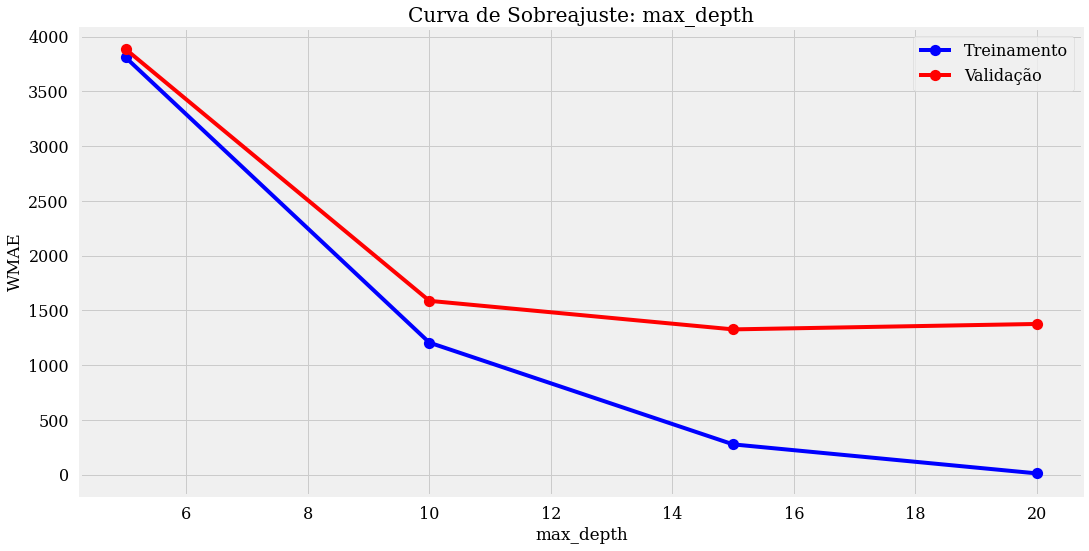

In [ ]:
test_param_and_plot_xgb('max_depth', [5, 10, 15, 20])

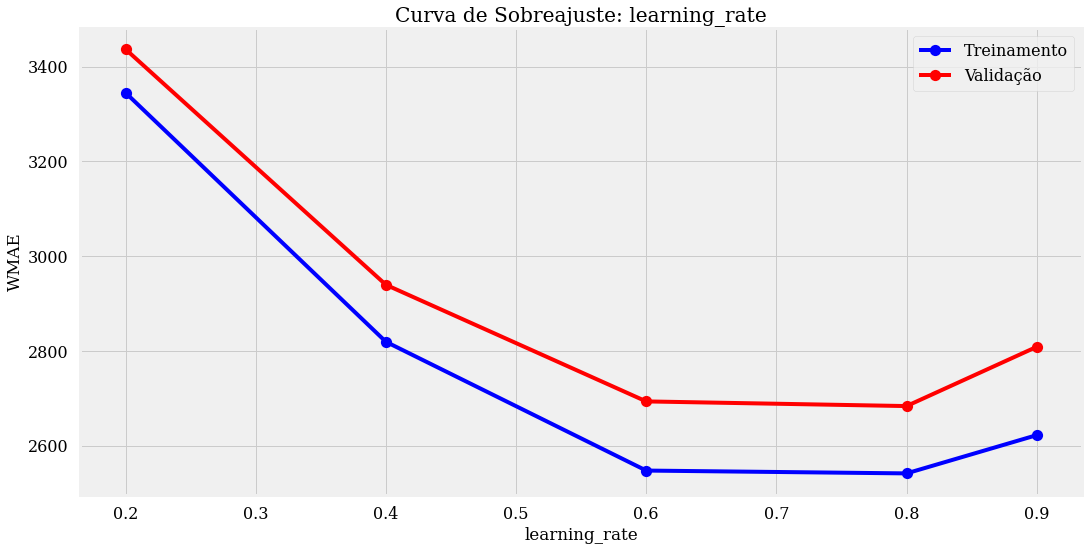

In [ ]:
test_param_and_plot_xgb('learning_rate', [0.2, 0.4, 0.6, 0.8, 0.9])

A partir do teste de parâmetros acima, os seguintes valores de parâmetros foram considerados os melhores, o que minimiza o erro de validação.

* max_depth: 20

* n_estimators: 500

* learning_rate: 0.8

Esses parâmetros variam um de cada vez, mas ambos estão inter-relacionados. Esses parâmetros são, então, variados simultaneamente; um ajuste fino do modelo, fazendo algumas suposições fundamentadas e a melhor combinação de valores que minimiza o erro de validação são as seguintes:

* max_depth: 15

* n_estimators: 400

* learning_rate: 0,35

In [ ]:
from xgboost import XGBRegressor

# Criar o modelo
gbm = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=400, max_depth=15, learning_rate=0.35)

# Ajustar o modelo
gbm.fit(train_inputs, train_targets)

gbm_train_preds = gbm.predict(train_inputs)

# Calcule WMAE em dados de treinamento
gbm_train_wmae = WMAE(train_inputs, train_targets, gbm_train_preds)
print('A perda WMAE para o conjunto de treinamento é  {}.'.format(gbm_train_wmae))

gbm_val_preds = gbm.predict(val_inputs)

# Calcular WMAE em dados de validação
gbm_val_wmae = WMAE(val_inputs, val_targets, gbm_val_preds)
print('A perda WMAE para o conjunto de validação é  {}.'.format(gbm_val_wmae))

A perda WMAE para o conjunto de treinamento é  16.66.
A perda WMAE para o conjunto de validação é  1339.29.


# Comparação do modelo
Regressão linear
* WMAE para conjunto de treinamento: 14776,36
* WMAE para conjunto de validação: 14884,37

Ridge Regression
* WMAE para conjunto de treinamento: 14776,33
* WMAE para conjunto de validação: 14884,34

Árvore de Decisão
* WMAE para conjunto de treinamento: 0,0
* WMAE para conjunto de validação: 1938,54

Floresta Aleatória
* WMAE para conjunto de treinamento: 569,99
* WMAE para conjunto de validação: 1571,46

Máquina de aumento de gradiente
* WMAE para conjunto de treinamento: 16,66
* WMAE para conjunto de validação: 1339,29


*O melhor desempenho entre os modelos testados é  'Gradient Boosting Machine'  com hiperparâmetros ajustados*


# Fazendo previsões

In [ ]:
test_preds = gbm.predict(testing_merged)
testing_merged['Weekly_Sales'] = test_preds


# Submissão


In [ ]:
submission = pd.read_csv('./walmart-recruiting-store-sales-forecasting/sampleSubmission.csv')


submission['Weekly_Sales'] = test_preds
submission.to_csv('submission.csv',index=False)

# Inferências e conclusões
As seguintes inferências e conclusões podem ser tiradas da análise dos dados:

1. As lojas do tipo 'A' são mais populares do que os tipos 'B' e 'C'

2. As lojas do tipo 'A' superam os tipos 'B' e 'C' em termos de tamanho e as vendas semanais médias

3. As vendas semanais são efetuadas na semana do ano. As semanas de férias tiveram mais vendas do que as semanas de não feriados. Notáveis ​​são as semanas de Ação de Graças e Natal

4. O tamanho da loja é um fator importante nas vendas semanais

5. As vendas também dependem do departamento da loja, pois diferentes departamentos mostraram diferentes níveis de vendas semanais

6. Entre os modelos treinados para prever as vendas futuras, o Grdient Boosting Machine com hiperparâmetros ajustados apresenta o melhor desempenho